# Data Exploration

Perform Data Exploration on the Consolidated Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [2]:
path_df = "./Pickles/all_articles_raw.pickle"

with open(path_df, 'rb') as data:
    articles = pickle.load(data)

## News Source

In [3]:
articles.head()

,source,title,article,category
0,The Straits Times,"Sales for Handmaid's Tale sequel top 125,000 c...",\nNEW YORK (AP) - Sales for Margaret Atwood's ...,Lifestyle
1,The Straits Times,R. Kelly a no-show in court on Minnesota solic...,\nMINNEAPOLIS (AP) - Singer R. Kelly was a no-...,Lifestyle
2,The Straits Times,HK director Derek Tsang picks forest in Japan ...,"\nSoul Mate director Derek Tsang, 39, is known...",Lifestyle
3,The Straits Times,"Tony Hadley, ex-frontman of Spandau Ballet, to...",\nSINGAPORE - The voice behind Spandau Ballet ...,Lifestyle
4,The Straits Times,South Korean actor Sung Hoon holding meet-and-...,\nSINGAPORE - South Korean heart-throb Sung Ho...,Lifestyle


In [4]:
len(articles)

10919

Text(0.5, 1.0, 'News Source')

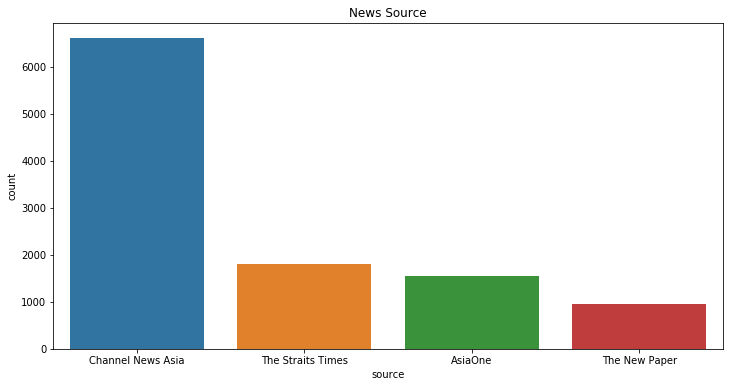

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='source',data=articles,order=articles['source'].value_counts().iloc[:10].index,).set_title("News Source")

In [6]:
articles['source'].value_counts()

Channel News Asia    6612
The Straits Times    1810
AsiaOne              1541
The New Paper         956
Name: source, dtype: int64

## Article Categories

Text(0.5, 1.0, 'Categories')

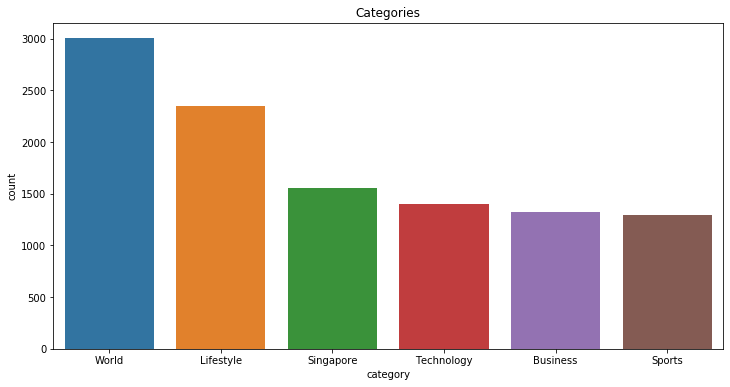

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='category',data=articles,order=articles['category'].value_counts().iloc[:10].index,).set_title("Categories")

In [8]:
articles['category'].value_counts()

World         3005
Lifestyle     2347
Singapore     1552
Technology    1400
Business      1323
Sports        1292
Name: category, dtype: int64

In [9]:
all_categories= articles['category'].unique()
all_categories

array(['Lifestyle', 'World', 'Technology', 'Business', 'Singapore',
       'Sports'], dtype=object)

In [10]:
sampled_data =[]
for category in all_categories:
    df = articles[articles['category']==category].sample(n=1200)
    sampled_data.append(df)

In [11]:
all_articles = pd.concat(sampled_data)
all_articles.head()

,source,title,article,category
3007,AsiaOne,7 factors to consider when looking for an HDB ...,Whether you’re buying an HDB resale flat as a ...,Lifestyle
1005,The Straits Times,Jung Joon-young first to be charged in K-pop s...,\nSEOUL - He was the first to be arrested in t...,Lifestyle
1168,The Straits Times,Music mogul Dr Dre gets flak over boast that h...,\nLOS ANGELES - Look who is talking about a la...,Lifestyle
5621,Channel News Asia,NaN,"We thought Colonel Sanders , was quirky enough...",Lifestyle
5828,Channel News Asia,NaN,The Mexican government has questioned Louis Vu...,Lifestyle


In [12]:
#all_articles=articles

In [13]:
all_articles['category'].value_counts()

Sports        1200
Technology    1200
Lifestyle     1200
Business      1200
Singapore     1200
World         1200
Name: category, dtype: int64

## Article Length

In [14]:
all_articles['length_characters'] = all_articles['article'].apply(len)
all_articles['length_words']=all_articles['article'].str.split().str.len()
all_articles.head()

,source,title,article,category,length_characters,length_words
3007,AsiaOne,7 factors to consider when looking for an HDB ...,Whether you’re buying an HDB resale flat as a ...,Lifestyle,9771,1769
1005,The Straits Times,Jung Joon-young first to be charged in K-pop s...,\nSEOUL - He was the first to be arrested in t...,Lifestyle,2162,324
1168,The Straits Times,Music mogul Dr Dre gets flak over boast that h...,\nLOS ANGELES - Look who is talking about a la...,Lifestyle,1108,182
5621,Channel News Asia,NaN,"We thought Colonel Sanders , was quirky enough...",Lifestyle,1193,207
5828,Channel News Asia,NaN,The Mexican government has questioned Louis Vu...,Lifestyle,1484,231


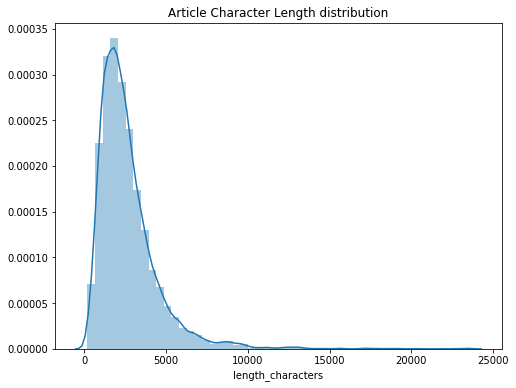

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(all_articles['length_characters']).set_title('Article Character Length distribution');

In [16]:
all_articles['length_characters'].describe()

count     7200.000000
mean      2686.456667
std       1912.585901
min        205.000000
25%       1486.750000
50%       2250.000000
75%       3311.000000
max      23548.000000
Name: length_characters, dtype: float64

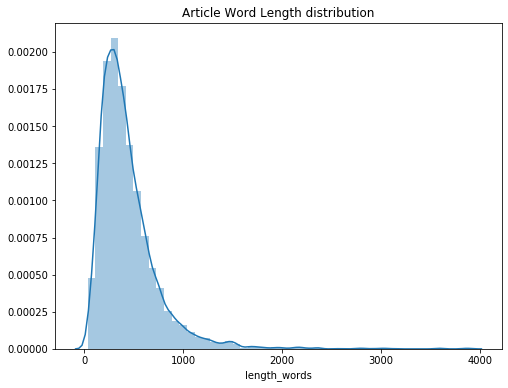

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(all_articles['length_words']).set_title('Article Word Length distribution');

In [18]:
all_articles['length_words'].describe()

count    7200.000000
mean      442.361667
std       315.890639
min        35.000000
25%       244.000000
50%       369.000000
75%       548.000000
max      3896.000000
Name: length_words, dtype: float64

### Longest Article

In [19]:
all_articles[all_articles['length_words']==5350]

,source,title,article,category,length_characters,length_words


### Shortest Article

In [20]:
liverpool = all_articles[all_articles['length_words']==21]

In [21]:
liverpool['article']

Series([], Name: article, dtype: object)

### Article Length by Category

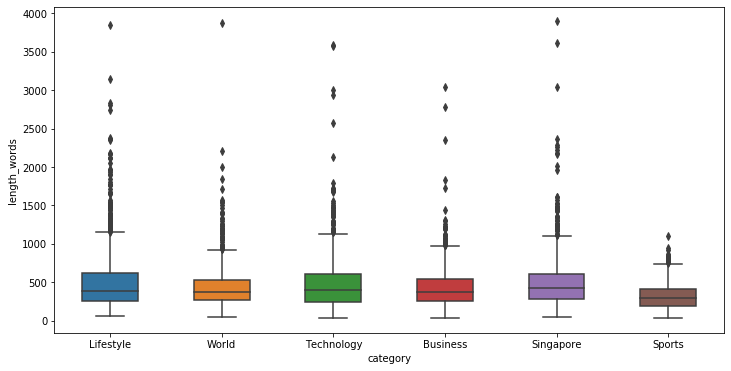

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=all_articles, x='category', y='length_words', width=.5);

In [23]:
all_articles.groupby('category')['length_words'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Business,1200.0,426.053333,268.747567,35.0,250.0,377.0,542.00,3040.0
Lifestyle,1200.0,517.174167,413.830306,64.0,251.0,387.0,614.25,3847.0
Singapore,1200.0,493.639167,344.590190,43.0,280.0,420.5,613.00,3896.0
Sports,1200.0,324.609167,163.173055,40.0,197.0,297.0,418.00,1107.0
Technology,1200.0,466.093333,342.683091,36.0,248.0,393.0,606.25,3586.0
World,1200.0,426.600833,263.947634,43.0,268.0,368.0,527.25,3873.0


In [24]:
#Export to Serialized Object
with open('Pickles/sampled_articles_raw.pickle', 'wb') as output:
    pickle.dump(all_articles, output)